#  Cyberbullying Detection: Racism & Sexism  (comments for Marta)

 ### 1.  Explain the Datasets We Are Going to Use

 We will work with two types of text data, resulting in a total of three datasets.
 The complexity of this project arises from the different text types, varying lengths,
 and the specific preprocessing required for each dataset.

 1.1 Twitter Datasets
 The datasets `twitter_sexism_parsed_dataset` and `twitter_racism_parsed_dataset` contain tweets (short texts) labeled as:
 - "racism" → if the tweet contains racist content
 - "sexism" → if the tweet contains sexist comments
 - "none" → if the tweet is neutral and does not include any meaningful comment or cyberbullying

 1.2 YouTube Dataset
 The third dataset is `youtube_parsed_dataset`, which consists of YouTube comments.
 These comments can be either neutral or classified as cyberbullying. However, unlike the Twitter datasets,
 the specific type of cyberbullying (e.g., racism or sexism) is not labeled.
 
 **Metadata:** This includes information about the type of cyberbullying (racism, sexism) or "other"  if the comment lacks specific metadata.

### 2.  Preprocessing

#For the Twitter datasets, we will clean the text by:
 - Removing mentions between users → re.sub(r'@\w+', '', text)
 - Removing URLs → re.sub(r'http\S+', '', text)
 - Removing hashtags → re.sub(r'#\w+', '', text) 
 then plot examples of the cleaned text for each category:
"racist", "sexist", and neutral tweets.



### 3.  ( I dont think they want us to do anything here)



### 4.  What We Want to Track

 Our goal is to detect and classify two specific types of cyberbullying: racism and sexism. Specifically, we want to:

 - Label comments in the `youtube_parsed_dataset` by identifying instances of racism and sexism.
 - Filter comments that have been labeled as "racist" or "sexist" and compute the Document-Term Matrix (DTM)
   for each dataset to identify the most frequent words.

 **Approach 1:**
 - When analyzing comments that are already labeled as racist or sexist, we will NOT use TF-IDF.
   TF-IDF penalizes words that appear frequently across documents, but in this case,
   common words across all racist or sexist comments may be crucial for detecting aggressive speech. Instead, we will rely on term frequency (TF). However, since tweets are short texts,
   many terms appear only once or twice, leading to identical TF scores for important and unimportant words.
   This complicates differentiation between them.

 **Approach 2:**
 - We will also apply TF-IDF to the entire dataset (ignoring existing labels) to identify distinguishing terms.
   In this case, TF-IDF helps penalize common words and highlights more unique terms,
   which can aid in building a more refined dictionary based on higher IDF scores.


 We will compare the dictionaries generated by the two methods:
 - CountVectorizer (for labeled racist/sexist comments)
 - TF-IDF-based (for the entire dataset)

This comparison will help determine which approach is more effective in detecting and classifying cyberbullying.
### 5. 
-Our first approach was to create dictionaries using bigrams because we believed this would make racism  more evident and easier to interpret. We aimed to obtain bigrams with the following structure: **Adjective + Noun (race)**, where the adjective would be a descriptive term with a negative connotation (mostly insults), and the noun would refer to the race being targeted. We expected to identify the most frequent bigrams that denote racism or are commonly used in a racist context. Additionally, for monograms, we aimed to extract words representing the races that experience racism, as well as common insults.

-For sexism, we expected the dictionaries to help identify the discriminated gender (the target) as one of the most frequent words, along with insults or expressions related to sexist comments. Since we planned to set the ngram_range from 1 to 3, we anticipated that common bigrams would follow a similar structure to racist expressions, specifically **Adjective + Noun (gender)**.

Why somoene wants to track the type of vocabulary?:
    The purpose of detecting racist and sexist language is to help exclude such comments from online platforms. This could be useful for websites like Facebook, Instagram, and Twitter, allowing moderators to track racist and sexist users and ban them if necessary. By implementing this, platforms can ensure a safer environment where users are not attacked based on their gender or race.

    Additionally, this tool could be used in hiring processes and interviews to check whether candidates have been involved in racist or sexist behavior in their digital footprint, which could potentially harm a company’s reputation. It could also help identify which races and genders experience the most cyberbullying, leading to targeted actions to prevent and reduce such harassment.

What questions could be answer with it : (some examples that i thoug)
being able to identify the most targeted gender and race
- Which race suffers most racism? (this question *not sure bcs if we said that in our dataset has basicaly islamophobia) but this is something that we can explain in the results of 6
- Which gender suffers the most sexism?
- What are the most common expressions used to express racism?
- What are the most common expressions used to express sexism?
- Are YouTube comments classified as cyberbullying, sexist, or racist?

### 6.

once we implemented or methods we realised:  The type of racism we have in the dataset is Islamophobia. Probably, the tweets are obtained from the same Twitter thread that is related to the Islamic community. So this would specify to find a type or racism. 
  - compare the Racism dictionary obtained by aproach 1 and aproach2, and the bigrams dictionary 
 - COmpare teh 2 dictionaries of sexism,
  explain number of common words, why are some differencs, which is better ...etc


### 7. 
show the classification of the youtube dataset. Explain results:
- there is a huge difference between the detection with bigramns and monograms. 

**Comparation between the Bigramns and the Monograms Detection**
This comparison is all relative. Since this part is self-supervised and the YouTube comments aren’t labeled, we have to manually check how well both detection methods work.

In the Bigram Racism classification, only a small number of instances are flagged, but when it does flag something, it’s usually correct. In other words, its accuracy—the probability that it correctly identifies a comment as racist—is very high. We end up classifying less than 1% of the comments as racist. We don’t know if there are more racist comments out there because the data isn’t labeled, but the ones it does classify are reliably racist.

On the other hand, when we use other dictionaries, we get much higher classification rates (DTM: 21.05%, TF-IDF: 60.28%), but many of those are false positives. A good approach might be to use the dictionaries with higher classification rates as a preliminary screening tool. Then, after filtering, we can apply the Bigram detection on that smaller set of comments. This way, we reduce the overall amount of data that needs heavy processing and lower the computational cost while keeping the final results more accurate.

**TF-IDF vs DTM**
As expected, using TF-IDF on the entire dataset works worse than using a standard count vectorizer on the labeled data (with categories like "racism" and "sexism"). This is because when we apply TF-IDF to the whole dataset, it picks up words that are common in non-cyberbullying comments as well. Then, when we use this dictionary to classify comments, many generic words that aren’t specifically related to sexism or racism end up triggering classifications. This leads to an increase in Type I errors (false positives), as a large number of comments are incorrectly labeled.

### 8.

In [139]:

#!pip install pandas nltk spacy scikit-learn matplotlib tqdm
import kagglehub
import os
import re
import csv
import sys
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm


# Function to download NLTK resources
def download_nltk_resources():
    required_resources = ['wordnet', 'stopwords', 'punkt']
    for resource in required_resources:
        try:
            nltk.data.find(f'tokenizers/{resource}' if resource == 'punkt' else f'corpora/{resource}')
        except LookupError:
            nltk.download(resource)

download_nltk_resources()

# Function to install and load spaCy model
def install_spacy_model(model_name):
    try:
        return spacy.load(model_name)
    except OSError:
        print(f"Downloading spaCy model: {model_name}")
        subprocess.check_call([sys.executable, "-m", "spacy", "download", model_name])
        return spacy.load(model_name)

sp = install_spacy_model('en_core_web_sm')

# Enable tqdm for pandas
tqdm.pandas()

# Initialize stemmers and lemmatizer
porter = SnowballStemmer("english")
lmtzr = WordNetLemmatizer()
STOP_WORDS = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/polgarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [140]:

def preprocess_lower(text):

    text_lower = text.lower()
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)
    tokens = word_tokenize(text_no_punct)
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]
    return " ".join(filtered_tokens)

def preprocess_stem(text):
  
    tokens = preprocess_lower(text).split()
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

def preprocess_lemma(text):
  
    doc = sp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip() != '']
    return " ".join(lemmatized_tokens)

def tokenize(text, mode=0):
    if mode == 0:
        return preprocess_lower(text)
    elif mode == 1:
        return preprocess_stem(text)
    elif mode == 2:
        return preprocess_lemma(text)
    else:
        raise ValueError("Invalid mode. Please use 0 for lowercasing, 1 for stemming, or 2 for lemmatizing.")


In [141]:
#kAGLE APPI:
#!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gbiamgaurav/cyberbullying-detection")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Available files:", files)

# Load a specific document (Assuming it's a CSV file)
file_path = os.path.join(path, "twitter_racism_parsed_dataset.csv")  # Change "filename.csv" to the actual file name
corpus_data = pd.read_csv(file_path)

# Display the first few rows
print(corpus_data.head())

Path to dataset files: /Users/polgarcia/.cache/kagglehub/datasets/gbiamgaurav/cyberbullying-detection/versions/1
Available files: ['youtube_parsed_dataset.csv', 'twitter_parsed_dataset.csv', 'twitter_sexism_parsed_dataset.csv', 'attack_parsed_dataset.csv', 'twitter_racism_parsed_dataset.csv', 'kaggle_parsed_dataset.csv', 'toxicity_parsed_dataset.csv', 'aggression_parsed_dataset.csv']
          index            id  \
0  5.767493e+17  5.767493e+17   
1  5.408905e+17  5.408905e+17   
2  5.678433e+17  5.678433e+17   
3  5.766462e+17  5.766462e+17   
4  5.713492e+17  5.713492e+17   

                                                Text Annotation  oh_label  
0  @AAlwuhaib1977 Muslim mob violence against Hin...     racism         1  
1             @Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG       none         0  
2  @jncatron @isra_jourisra @AMPalestine Islamoph...     racism         1  
3  Finally I'm all caught up, and that sudden dea...       none         0  
4             @carolinesinders @he

In [142]:
corpus_data.info()
corpus_data['word_count'] = corpus_data['Text'].apply(lambda x: len(str(x).split()))

corpus_data['word_count'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       13471 non-null  float64
 1   id          13471 non-null  float64
 2   Text        13471 non-null  object 
 3   Annotation  13471 non-null  object 
 4   oh_label    13471 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 526.3+ KB


count    13471.000000
mean        14.903422
std          6.574960
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         34.000000
Name: word_count, dtype: float64

## we will need to do some preprocessing,
 as, there are a lot of words that are citations between people, so what we will do is eliminate all the citations, and the links (https:...):

In [143]:

def clean_text(text):
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)
    text = text.lower() #i lowercase
    
    return text.strip()


as we are working with small texts as tweets, we are not going to stemming  because we dont want to loose much information. 

In [144]:
def preprocess_text(text):
    if isinstance(text, str):
        # Clean the text
        cleaned_text = clean_text(text)
        
        # Tokenize the cleaned text
        tokens = word_tokenize(cleaned_text)
        
        #maybe use this: tokenize(text,mode=2)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        custom_stopwords = {'like', 'go', 'gone', 'goes', 'dont', 'gets', 'think', 'thinks', 'one', 'would', 'look', 'no', 'time', 'say',
                    'oh','andre','mkr', 'use', 'uses', 'that', 'even', 'event', 'see', 'good', 'need', 'would', 'got', 'still','year','ago','have','ve','had',}
        stop_words.update(custom_stopwords)
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        # Join the filtered tokens back into a single string
        preprocessed_text = ' '.join(filtered_tokens)
        preprocessed_text= preprocess_lemma(preprocessed_text)
        return preprocessed_text
    else:
        return ''

In [145]:

# Apply cleaning function
corpus_data['clean_text'] = corpus_data['Text'].apply(preprocess_text)
print(corpus_data.head())



          index            id  \
0  5.767493e+17  5.767493e+17   
1  5.408905e+17  5.408905e+17   
2  5.678433e+17  5.678433e+17   
3  5.766462e+17  5.766462e+17   
4  5.713492e+17  5.713492e+17   

                                                Text Annotation  oh_label  \
0  @AAlwuhaib1977 Muslim mob violence against Hin...     racism         1   
1             @Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG       none         0   
2  @jncatron @isra_jourisra @AMPalestine Islamoph...     racism         1   
3  Finally I'm all caught up, and that sudden dea...       none         0   
4             @carolinesinders @herecomesfran *hugs*       none         0   

   word_count                                         clean_text  
0          13     muslim mob violence hindus bangladesh continue  
1           2                                                     
2          21  islamophobia idea naziphobia islam religion ha...  
3          18  finally m catch sudden death cook looks go to ...  
4  

As we can see now we have some empty rows, for example if the tweet was just a link or a mention, we drop this rows

In [146]:
# Remove empty or whitespace-only rows in 'clean_text'
corpus_data = corpus_data.loc[corpus_data['clean_text'].str.strip() != '']

# Reset index after dropping rows (optional)
corpus_data = corpus_data.reset_index(drop=True)
corpus_data.head()
corpus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       13051 non-null  float64
 1   id          13051 non-null  float64
 2   Text        13051 non-null  object 
 3   Annotation  13051 non-null  object 
 4   oh_label    13051 non-null  int64  
 5   word_count  13051 non-null  int64  
 6   clean_text  13051 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 713.9+ KB


# Aproach 1 (Only use Labelled Data)


As we can see in this dataset we have 2 types of text, one that is labeled as "racism" and other labeled as None

In [147]:
racism=corpus_data[corpus_data['Annotation']=='racism']
racism.head()

,index,id,Text,Annotation,oh_label,word_count,clean_text
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,13,muslim mob violence hindus bangladesh continue
1,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,21,islamophobia idea naziphobia islam religion ha...
7,5.646041e+17,5.646041e+17,@HuffPostRelig Islam invaded and conquered 2/3...,racism,1,19,islam invade conquered christiandom christian ...
8,5.633700e+17,5.633700e+17,@semzyxx Do you approve of your pedophile prop...,racism,1,20,approve pedophile prophet rape old girl say ha...
9,5.669840e+17,5.669840e+17,@watan71969 @geeky_zekey Problem with vile Mus...,racism,1,24,problem vile muslim try rationalize amp excuse...


In [148]:
cv = CountVectorizer(ngram_range = (1,3),  min_df=0.01,max_df=0.9, lowercase=False)
cv.fit(racism["clean_text"])
vectorized_text=cv.transform(racism["clean_text"])
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (1968, 131)
['abuse' 'allah' 'amp' 'attack' 'barbarity' 'behead' 'believe' 'bigot'
 'bigotry' 'call' 'care' 'child' 'christian' 'christians' 'civilian'
 'come' 'country' 'cult' 'daesh' 'day' 'death' 'declare' 'declare war'
 'declare war humanity' 'exactly' 'example' 'excuse' 'exterminate' 'fight'
 'follow' 'force' 'freedom' 'girl' 'give' 'go' 'god' 'group' 'hadith'
 'hamas' 'hate' 'hatred' 'head' 'humanity' 'humanity year' 'idiot' 'isis'
 'islam' 'islam declare' 'islam declare war' 'islam religion' 'islamic'
 'islamist' 'islamolunatic' 'israel' 'jewish' 'jews' 'jihad' 'kill' 'know'
 'land' 'law' 'leave' 'liar' 'lie' 'live' 'make' 'man' 'mankind' 'mean'
 'microbrain' 'million' 'minority' 'mohamme' 'mohammed' 'murder'
 'murderer' 'muslim' 'muslims' 'non' 'not' 'old' 'outlaw' 'palestinians'
 'pedophile' 'pedophile prophet' 'people' 'problem' 'produce' 'propaganda'
 'prophet' 'prophet mohamme' 'quran' 'quran hadith' 'rape' 'read'
 'religion' 'religious' 'right

In [149]:

X = cv.fit_transform(racism["clean_text"])
terms = cv.get_feature_names_out()
# Calculate term frequencies (total counts across all documents)
term_frequencies = X.sum(axis=0).A1  # Convert to 1D array
dictionary_racism = pd.DataFrame({'term': terms,'frequency': term_frequencies})
dictionary_racism = dictionary_racism.sort_values(by='frequency', ascending=False).reset_index(drop=True)
dictionary_racism['id'] = dictionary_racism.index + 1
print(dictionary_racism.head(20))


         term  frequency  id
0       islam        512   1
1      muslim        454   2
2      murder        185   3
3    religion        152   4
4     muslims        141   5
5     prophet        136   6
6    mohammed        135   7
7        isis        134   8
8       quran        127   9
9      people        125  10
10       jews        122  11
11      woman        112  12
12        not        101  13
13        war         91  14
14       year         87  15
15  terrorist         87  16
16       kill         85  17
17       want         82  18
18      slave         82  19
19      world         77  20


### PLOTS

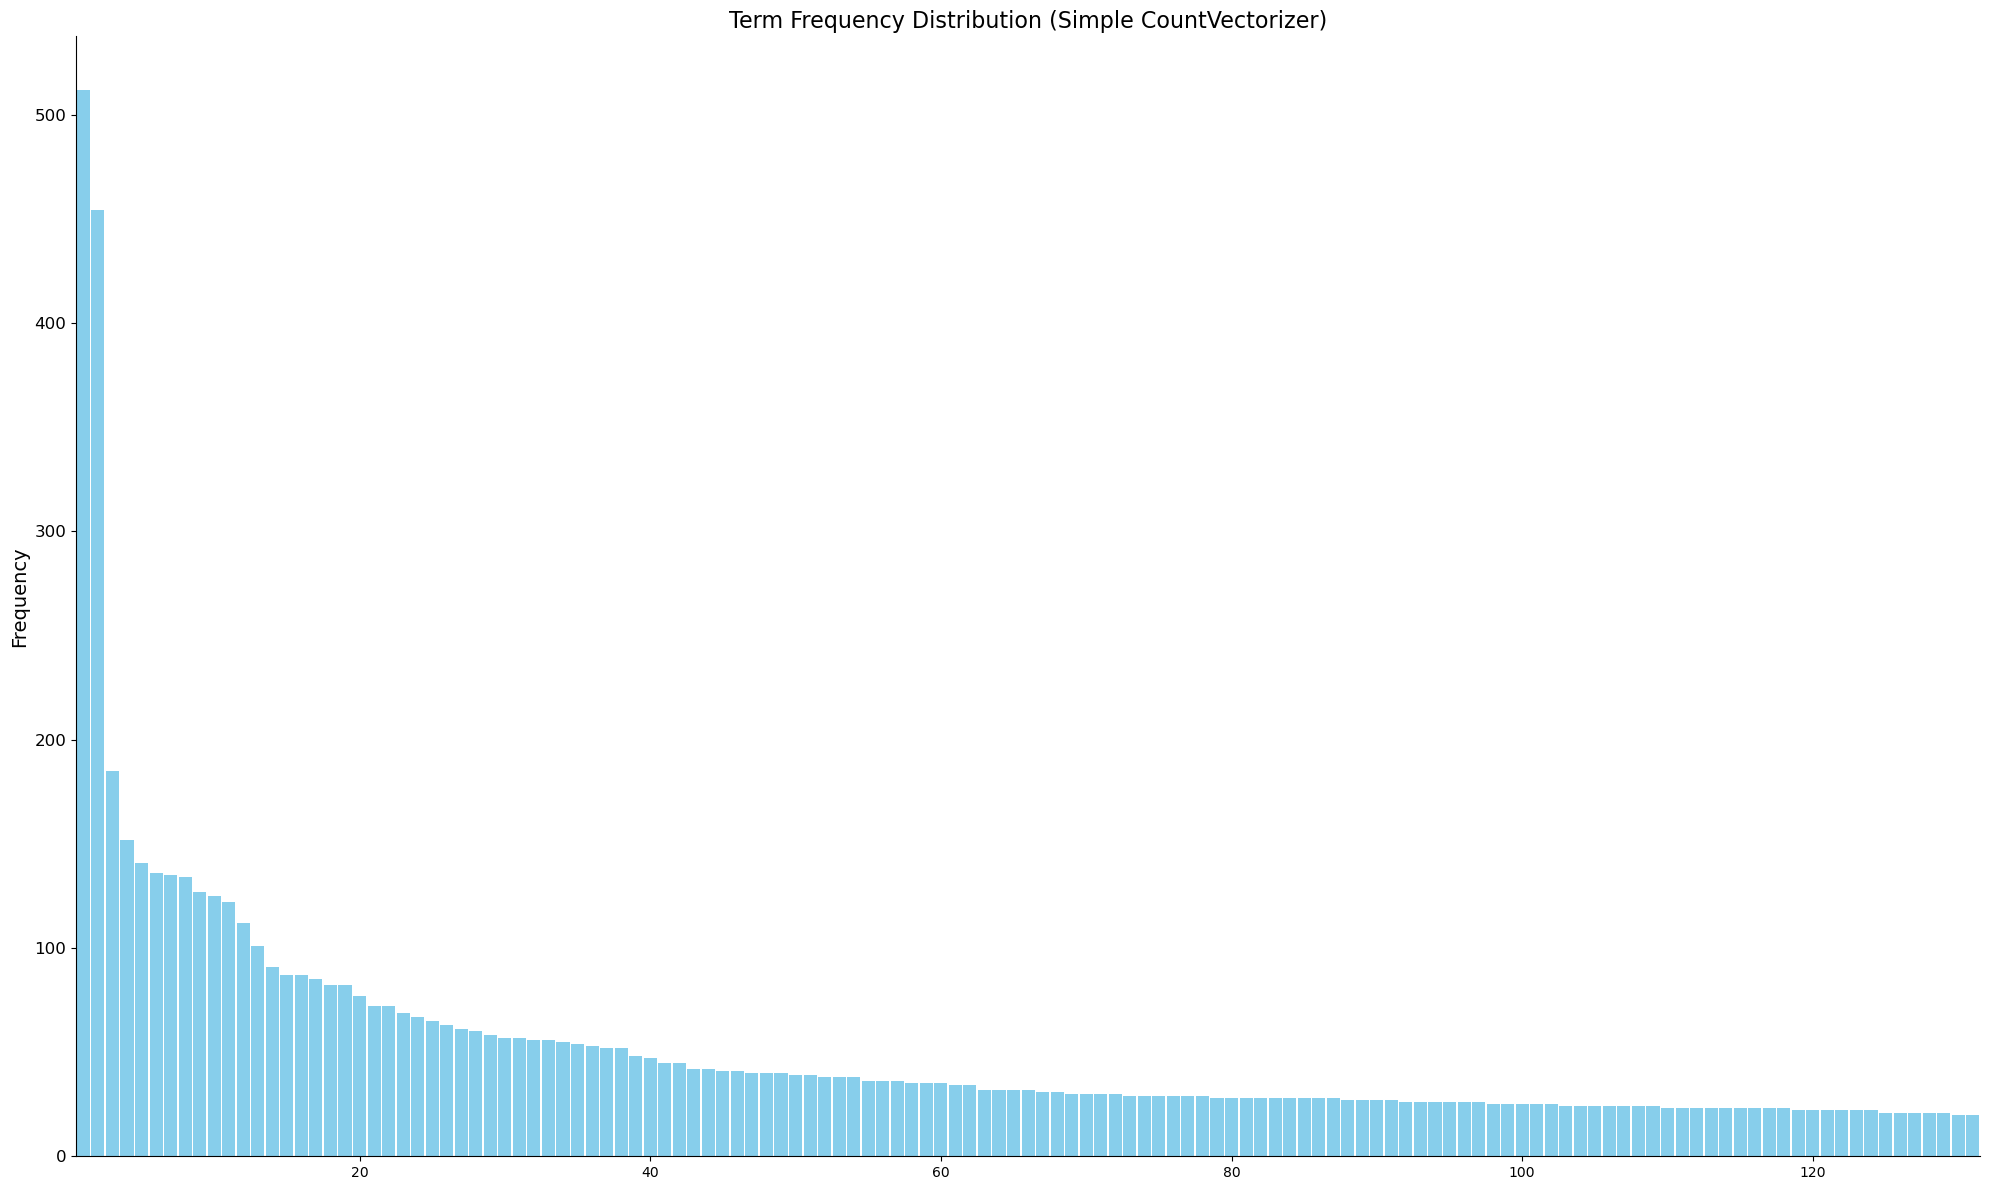

In [178]:
# Define the total number of terms
V = dictionary_racism.shape[0]

# Create the x-axis IDs
x_ids = dictionary_racism['id']

# Get the corresponding frequencies
frequencies = dictionary_racism['frequency']

plt.figure(figsize=(20, 12))

# Create the bar plot with increased width and centered alignment
plt.bar(x_ids, frequencies, width=0.9, color='skyblue', align='center')

# Remove x-axis labels and tick marks
plt.xlabel('')
plt.ylabel('Frequency', fontsize=14)
plt.title('Term Frequency Distribution (Simple CountVectorizer)', fontsize=16)

# Customize the spines to retain only the bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Set x-axis limits to ensure the first bar starts at x=1
plt.xlim(0.5, V + 0.5)

# Ensure y-axis ticks are visible and appropriately sized
plt.yticks(fontsize=12)

# Apply log scale to the y-axis
#plt.yscale('log')

# Optimize layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# Aproach 2 whole dataset:


In [151]:
data=corpus_data
data.head()

,index,id,Text,Annotation,oh_label,word_count,clean_text
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,13,muslim mob violence hindus bangladesh continue
1,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,21,islamophobia idea naziphobia islam religion ha...
2,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,18,finally m catch sudden death cook looks go to ...
3,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,3,hug
4,5.102409e+17,5.102409e+17,"Please, PLEASE start using ""is your discernmen...",none,0,20,start discernment blunt steroid mean drug dead


now instead of Count Vecotrizer we are going to use Tf-idf.

In [180]:
# as the the comments that are labelled with racism are less than 20% of the total number of words, we are going to lower the max_df into a 20% so we focus in words that main only appear in the racism commments and not in the non racist comments, with this trick we can discard a huge amount of words that might appear in all the texts.

cv = TfidfVectorizer(ngram_range = (1,3), norm=None, lowercase=True, min_df=0.01, max_df=0.20, stop_words='english') 
cv.fit(data["clean_text"])
vectorized_text=cv.transform(data["clean_text"])
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (13051, 63)
['amp' 'attack' 'bad' 'colin' 'come' 'cook' 'daesh' 'day' 'feel' 'food'
 'fuck' 'girl' 'hate' 'hope' 'isis' 'islam' 'jews' 'kat' 'kill' 'know'
 'leave' 'let' 'lie' 'lol' 'look' 'love' 'make' 'man' 'mean' 'mohammed'
 'murder' 'muslim' 'muslims' 'people' 'pretty' 'prophet' 'quran' 'read'
 'religion' 'right' 'round' 'say' 'shit' 'start' 'stop' 'sure' 'talk'
 'team' 'tell' 'terrorist' 'thing' 'try' 'tweet' 'twitter' 've' 'want'
 'watch' 'way' 'woman' 'work' 'world' 'year' 'yes']


In [153]:

X = cv.fit_transform(data["clean_text"])
terms = cv.get_feature_names_out()

# this comment part is another way to calculate the tfidf score, but i liked more your way, so i change it. CHANGE AD THE 'id' term so i can do the plot

# tfidf_scores = X.sum(axis=0).A1  # Convert to 1D array

# data_terms = pd.DataFrame({
#     'term': terms,
#     'tfidf_score': tfidf_scores
# })

# # Sort the DataFrame by frequency in descending order
# data_terms =data_terms.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)

# data_terms['id'] = data_terms.index + 1

# print(data_terms.head(20))

# Compute the TF-IDF scores 

avg_tfidf = np.array(X.mean(axis=0)).flatten()

# Create a dataframe with words and corresponding TF-IDF scores 
tfidf_terms = pd.DataFrame({'term': terms, 'tfidf_score': avg_tfidf})

# Sort by descending TF-IDF score
tfidf_terms = tfidf_terms.sort_values('tfidf_score', ascending=False).reset_index(drop=True)
tfidf_terms['id'] = tfidf_terms.index + 1
# Filter for words with TF-IDF score > 0.01
tfidf_dictionary_racism = tfidf_terms[tfidf_terms['tfidf_score'] > 0.001]
print(tfidf_dictionary_racism.head(20))

      term  tfidf_score  id
0    islam     0.216258   1
1      kat     0.211919   2
2   people     0.193904   3
3   muslim     0.187953   4
4      amp     0.178889   5
5    woman     0.164478   6
6     know     0.140108   7
7     want     0.132559   8
8     isis     0.127511   9
9       ve     0.120258  10
10   thing     0.109678  11
11     man     0.103912  12
12     say     0.100416  13
13    cook     0.097374  14
14    fuck     0.094308  15
15    kill     0.093429  16
16     try     0.092262  17
17    tell     0.091031  18
18  murder     0.090884  19
19    talk     0.089809  20


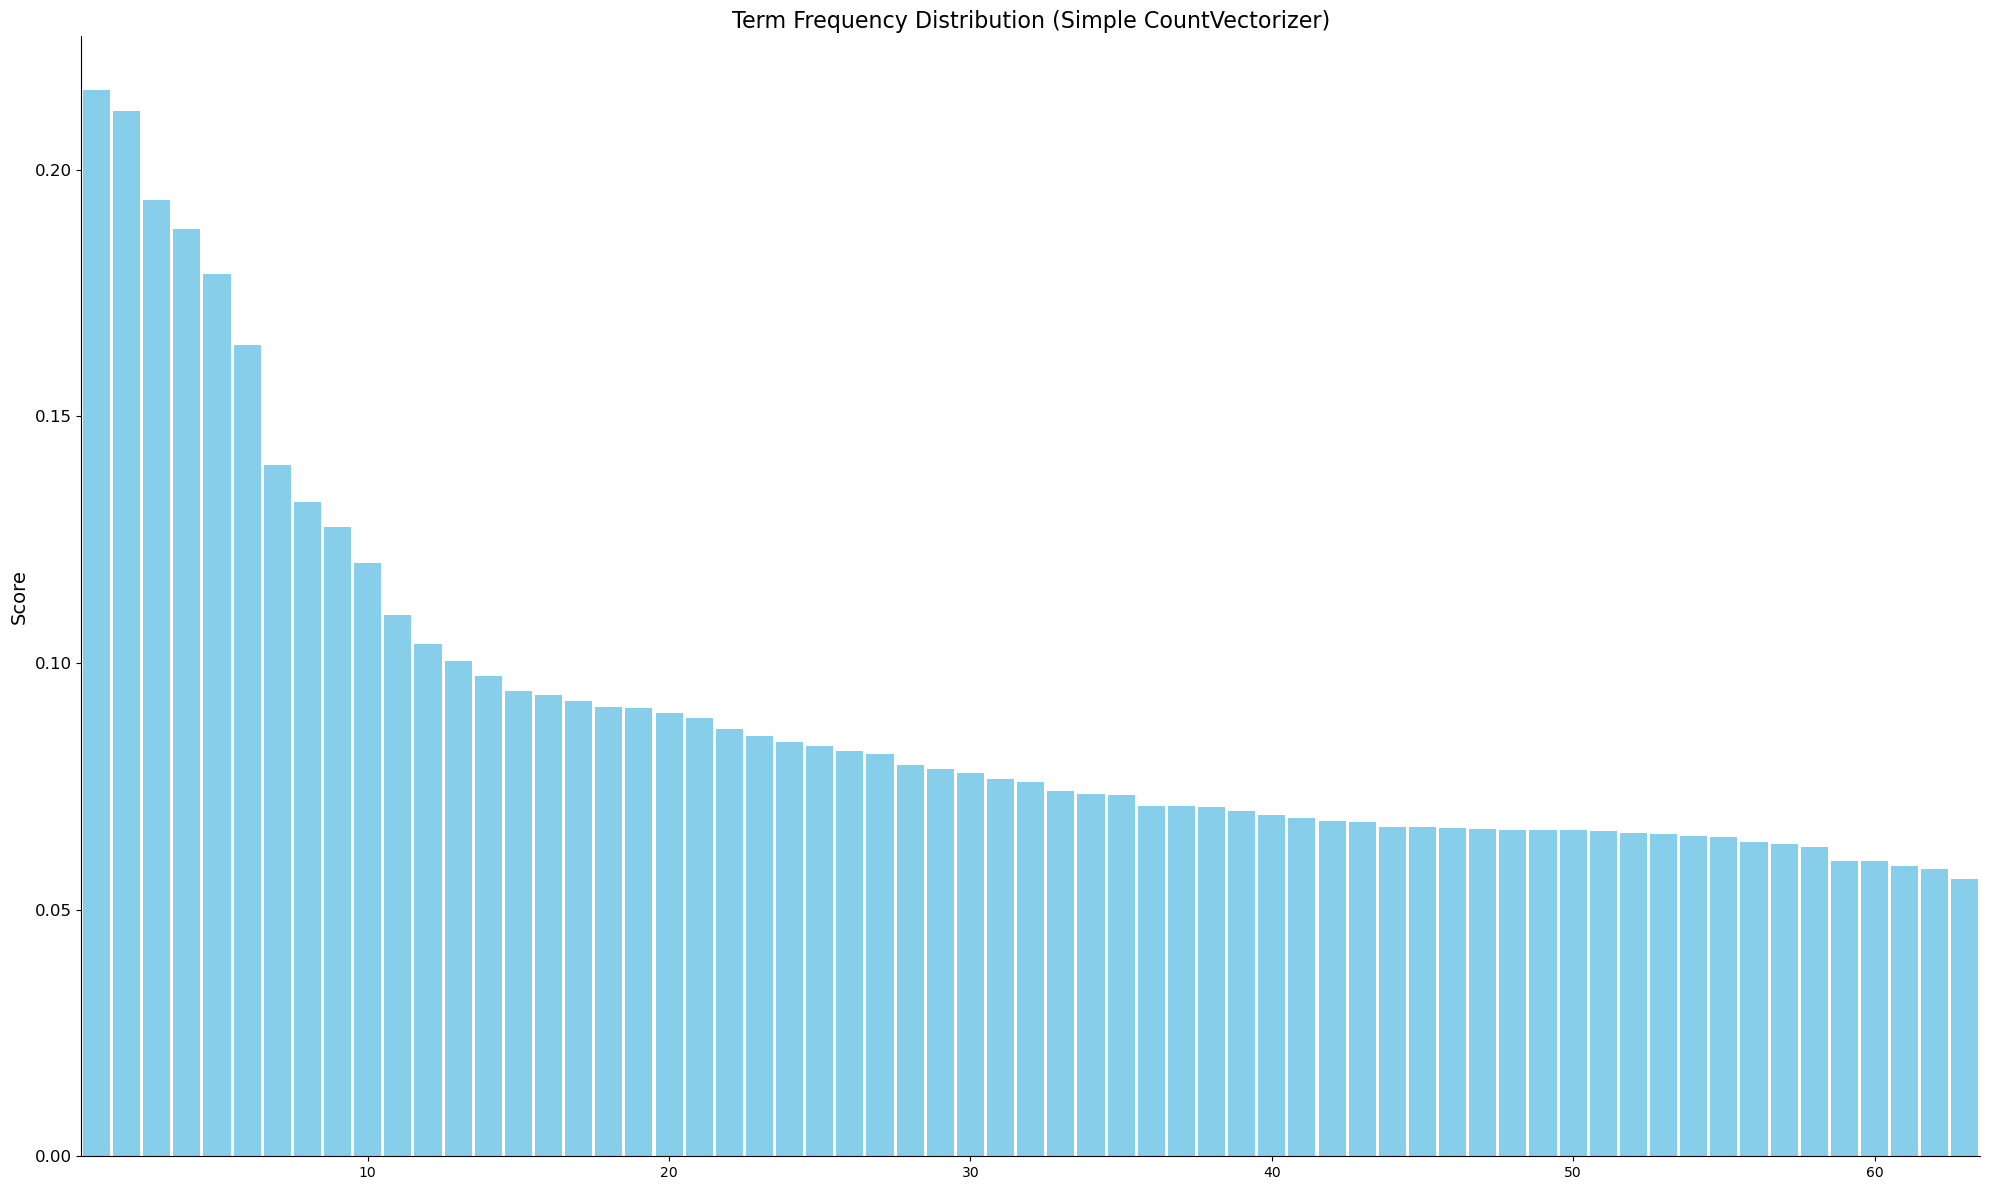

In [154]:
# Define the total number of terms
V = tfidf_dictionary_racism.shape[0]

# Create the x-axis IDs
x_ids = tfidf_dictionary_racism['id']  # THIS IS WRONG, 

# Get the corresponding frequencies
frequencies = tfidf_dictionary_racism['tfidf_score']

plt.figure(figsize=(20, 12))

# Create the bar plot with increased width and centered alignment
plt.bar(x_ids, frequencies, width=0.9, color='skyblue', align='center')

# Remove x-axis labels and tick marks
plt.xlabel('')
plt.ylabel('Score', fontsize=14)
plt.title('Term Frequency Distribution (Simple CountVectorizer)', fontsize=16)

# Customize the spines to retain only the bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.xlim(0.5, V + 0.5)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [155]:
# Commond words across the two dictionaries 
common_terms2 = set(dictionary_racism['term']) & set(tfidf_dictionary_racism['term'])
print(f"\n number of common words across the two dictionaries: {len(common_terms2)}")
print("examples of commond words:", list(common_terms2)[:20])


 number of common words across the two dictionaries: 41
examples of commond words: ['say', 'lie', 'prophet', 'kill', 'people', 'man', 'try', 'world', 'isis', 'quran', 'way', 'jews', 'islam', 'religion', 'thing', 'attack', 'talk', 'hate', 'terrorist', 'day']


# Sexism

In [156]:
# Download latest version
path = kagglehub.dataset_download("gbiamgaurav/cyberbullying-detection")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Available files:", files)

# Load a specific document (Assuming it's a CSV file)
file_path = os.path.join(path, "twitter_sexism_parsed_dataset.csv")  # Change "filename.csv" to the actual file name
corpus_data2 = pd.read_csv(file_path)

# Display the first few rows
print(corpus_data2.head())

Path to dataset files: /Users/polgarcia/.cache/kagglehub/datasets/gbiamgaurav/cyberbullying-detection/versions/1
Available files: ['youtube_parsed_dataset.csv', 'twitter_parsed_dataset.csv', 'twitter_sexism_parsed_dataset.csv', 'attack_parsed_dataset.csv', 'twitter_racism_parsed_dataset.csv', 'kaggle_parsed_dataset.csv', 'toxicity_parsed_dataset.csv', 'aggression_parsed_dataset.csv']
                   index                     id  \
0  5.35198627292254E+017  5.35198627292254E+017   
1  5.75984924030714E+017  5.75984924030714E+017   
2   5.7233536016588E+017   5.7233536016588E+017   
3  5.72337925708374E+017  5.72337925708374E+017   
4  4.43033024528011E+017  4.43033024528011E+017   

                                                Text Annotation  oh_label  
0  RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...     sexism       1.0  
1   There's some very hate able teams this year #MKR       none       0.0  
2  RT @The_Eccles: "Everyone underestimated us" \...       none       0.0  
3 

In [157]:
# Apply cleaning function
corpus_data2['clean_text'] = corpus_data2['Text'].apply(preprocess_text)
print(corpus_data2.head())
# Remove empty or whitespace-only rows in 'clean_text'
corpus_data2 = corpus_data2.loc[corpus_data2['clean_text'].str.strip() != '']

# Reset index after dropping rows (optional)
corpus_data2 = corpus_data2.reset_index(drop=True)
corpus_data2.head()
print(corpus_data2.info())

                   index                     id  \
0  5.35198627292254E+017  5.35198627292254E+017   
1  5.75984924030714E+017  5.75984924030714E+017   
2   5.7233536016588E+017   5.7233536016588E+017   
3  5.72337925708374E+017  5.72337925708374E+017   
4  4.43033024528011E+017  4.43033024528011E+017   

                                                Text Annotation  oh_label  \
0  RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...     sexism       1.0   
1   There's some very hate able teams this year #MKR       none       0.0   
2  RT @The_Eccles: "Everyone underestimated us" \...       none       0.0   
3  RT @NOTLukeDarcy: did @Channel7 or #MKR actual...       none       0.0   
4  No, you don't. @Shut_Up_Jeff: I thought of a r...     sexism       1.0   

                            clean_text  
0    m sexist fuck woman not cook shit  
1                     s hate able team  
2  underestimate underestimate judging  
3           actually check people cook  
4    think funny joke pro

### Aproach 1:

In [158]:
sexism=corpus_data2[corpus_data2['Annotation']=='sexism']
sexism.head()

,index,id,Text,Annotation,oh_label,clean_text
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0,m sexist fuck woman not cook shit
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0,think funny joke promise m sexist
9,5.68436168649343E+017,5.68436168649343E+017,"RT @MetalBarbieDoll: But yea, apparently #Game...",sexism,1.0,yea apparently woman sock puppetslol
12,4.2696640533903E+017,4.2696640533903E+017,:D @nkrause11 Dudes who go to culinary school:...,sexism,1.0,dude culinary school
16,5.75596371610227E+017,5.75596371610227E+017,"If #cuntandandre make it through, I'll... I do...",sexism,1.0,ill know


In [181]:
#in this case, the sexism coments are less than 25% .
cv2 = CountVectorizer(ngram_range = (1,3),  min_df=0.01,max_df=0.30, lowercase=False)
cv2.fit(sexism["clean_text"])
vectorized_text=cv2.transform(sexism["clean_text"])
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv2.get_feature_names_out())

document term matrix has size (3334, 80)
['actually' 'amp' 'bad' 'believe' 'bitch' 'blonde' 'come' 'comedian'
 'cook' 'drive' 'driver' 'dumb' 'face' 'female' 'feminism' 'feminist'
 'find' 'football' 'fuck' 'funny' 'game' 'girl' 'go' 'great' 'guy' 'hate'
 'hear' 'hope' 'hot' 'job' 'kat' 'katie' 'know' 'lady' 'let' 'lol' 'look'
 'make' 'male' 'man' 'mean' 'model' 'nikki' 'not' 'people' 'play' 'pretty'
 'promo' 'rape' 'real' 'right' 'say' 'see' 'seriously' 'sexist'
 'sexist female' 'sexist girl' 'sexist woman' 'shit' 'sorry' 'sport'
 'stand' 'stop' 'stupid' 'suck' 'talk' 'tell' 'thing' 'try' 'tweet' 've'
 'want' 'watch' 'way' 'well' 'woman' 'woman not' 'women' 'work' 'wrong']


In [160]:

X = cv2.fit_transform(sexism["clean_text"])
terms = cv2.get_feature_names_out()
# Calculate term frequencies (total counts across all documents)
term_frequencies = X.sum(axis=0).A1  # Convert to 1D array
dictionary_sexism = pd.DataFrame({'term': terms,'frequency': term_frequencies})
dictionary_sexism = dictionary_sexism.sort_values(by='frequency', ascending=False).reset_index(drop=True)
dictionary_sexism['id'] = dictionary_sexism.index + 1
print(dictionary_sexism.head(20))

            term  frequency  id
0         sexist        957   1
1          woman        625   2
2            not        449   3
3           girl        356   4
4            kat        347   5
5            man        268   6
6         female        240   7
7           know        163   8
8          right        134   9
9       feminist        130  10
10  sexist woman        126  11
11          want        121  12
12         bitch        106  13
13           amp        105  14
14         sport        104  15
15          hate         99  16
16      football         95  17
17           say         91  18
18          fuck         90  19
19        people         88  20


In [161]:
dtm_bigrams = dictionary_sexism[dictionary_sexism['term'].str.contains(" ")]
print("bigrams in the dictionary:")
print(dtm_bigrams.value_counts())

bigrams in the dictionary:
term           frequency  id
sexist female  55         43    1
sexist girl    57         42    1
sexist woman   126        11    1
woman not      34         80    1
Name: count, dtype: int64


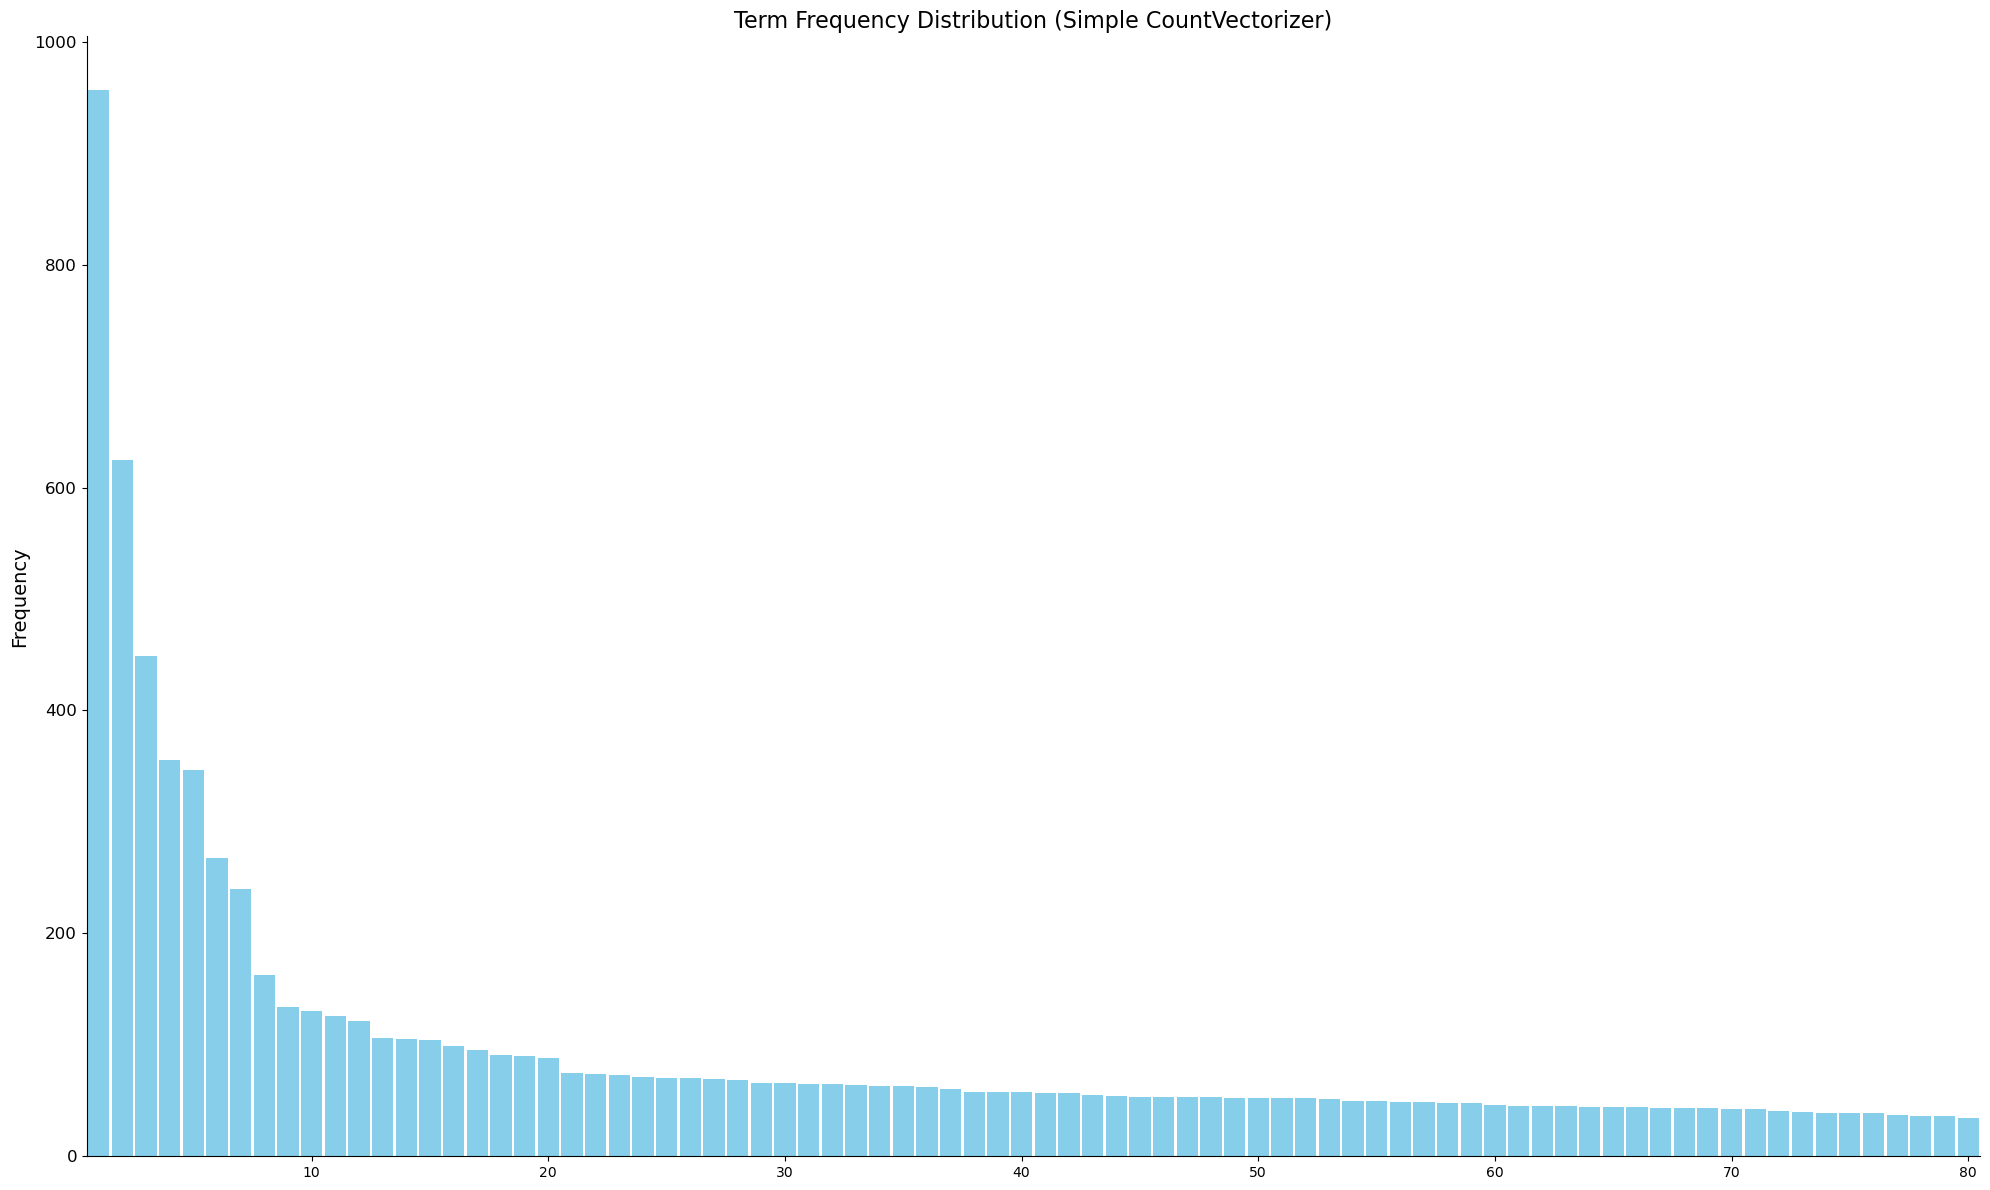

In [162]:
# Define the total number of terms
V = dictionary_sexism.shape[0]

# Create the x-axis IDs
x_ids = dictionary_sexism['id']

# Get the corresponding frequencies
frequencies = dictionary_sexism['frequency']

plt.figure(figsize=(20, 12))

# Create the bar plot with increased width and centered alignment
plt.bar(x_ids, frequencies, width=0.9, color='skyblue', align='center')

# Remove x-axis labels and tick marks
plt.xlabel('')
plt.ylabel('Frequency', fontsize=14)
plt.title('Term Frequency Distribution (Simple CountVectorizer)', fontsize=16)

# Customize the spines to retain only the bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.xlim(0.5, V + 0.5)


plt.yticks(fontsize=12)

plt.tight_layout()

# Display the plot
plt.show()


## Aproach 2:
(TF-IDF:)

In [163]:
data_sexism=corpus_data2
data_sexism.head()

,index,id,Text,Annotation,oh_label,clean_text
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0,m sexist fuck woman not cook shit
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0,s hate able team
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0,underestimate underestimate judging
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0,actually check people cook
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0,think funny joke promise m sexist


In [164]:
cv = TfidfVectorizer(ngram_range = (1,3), norm=None, lowercase=True, min_df=0.01, max_df=0.30, stop_words='english') 
cv.fit(data_sexism["clean_text"])
vectorized_text=cv.transform(data_sexism["clean_text"])
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (14418, 54)
['actually' 'amp' 'annie' 'bad' 'colin' 'come' 'cook' 'daesh' 'day' 'face'
 'feel' 'female' 'feminist' 'fuck' 'girl' 'guy' 'hate' 'hope' 'isis'
 'islam' 'kat' 'kill' 'know' 'let' 'lol' 'look' 'love' 'make' 'man' 'mean'
 'people' 'pretty' 'read' 'right' 'round' 'say' 'sexist' 'shit' 'stop'
 'sure' 'talk' 'team' 'tell' 'thing' 'try' 'tweet' 'twitter' 've' 'want'
 'watch' 'way' 'woman' 'work' 'yeah']


In [165]:

X = cv.fit_transform(data_sexism["clean_text"])
terms = cv.get_feature_names_out()

# this comment part is another way to calculate the tfidf score, but i liked more your way, so i change it.

# tfidf_scores = X.sum(axis=0).A1  # Convert to 1D array

# data_terms = pd.DataFrame({
#     'term': terms,
#     'tfidf_score': tfidf_scores
# })

# # Sort the DataFrame by frequency in descending order
# data_terms =data_terms.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)



# print(data_terms.head(20))

# Compute the TF-IDF scores 

avg_tfidf = np.array(X.mean(axis=0)).flatten()

tfidf_terms_sexism = pd.DataFrame({'term': terms, 'tfidf_score': avg_tfidf})
tfidf_terms_sexism =tfidf_terms_sexism.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)

tfidf_terms_sexism ['id'] = tfidf_terms_sexism .index + 1
# Sort by descending TF-IDF score

# Filter for words with TF-IDF score > 0.01
tfidf_dictionary_sexism = tfidf_terms_sexism[tfidf_terms_sexism['tfidf_score'] > 0.001]
print(tfidf_dictionary_sexism.head(20))

      term  tfidf_score  id
0   sexist     0.266416   1
1      kat     0.265082   2
2    woman     0.260250   3
3      amp     0.183736   4
4   people     0.171196   5
5     girl     0.159763   6
6     know     0.156155   7
7      man     0.151290   8
8     want     0.132387   9
9       ve     0.121266  10
10   thing     0.111188  11
11    fuck     0.108481  12
12   right     0.107751  13
13    cook     0.107223  14
14     say     0.106214  15
15  female     0.096183  16
16    talk     0.094013  17
17     way     0.090864  18
18     bad     0.089343  19
19    hate     0.088869  20


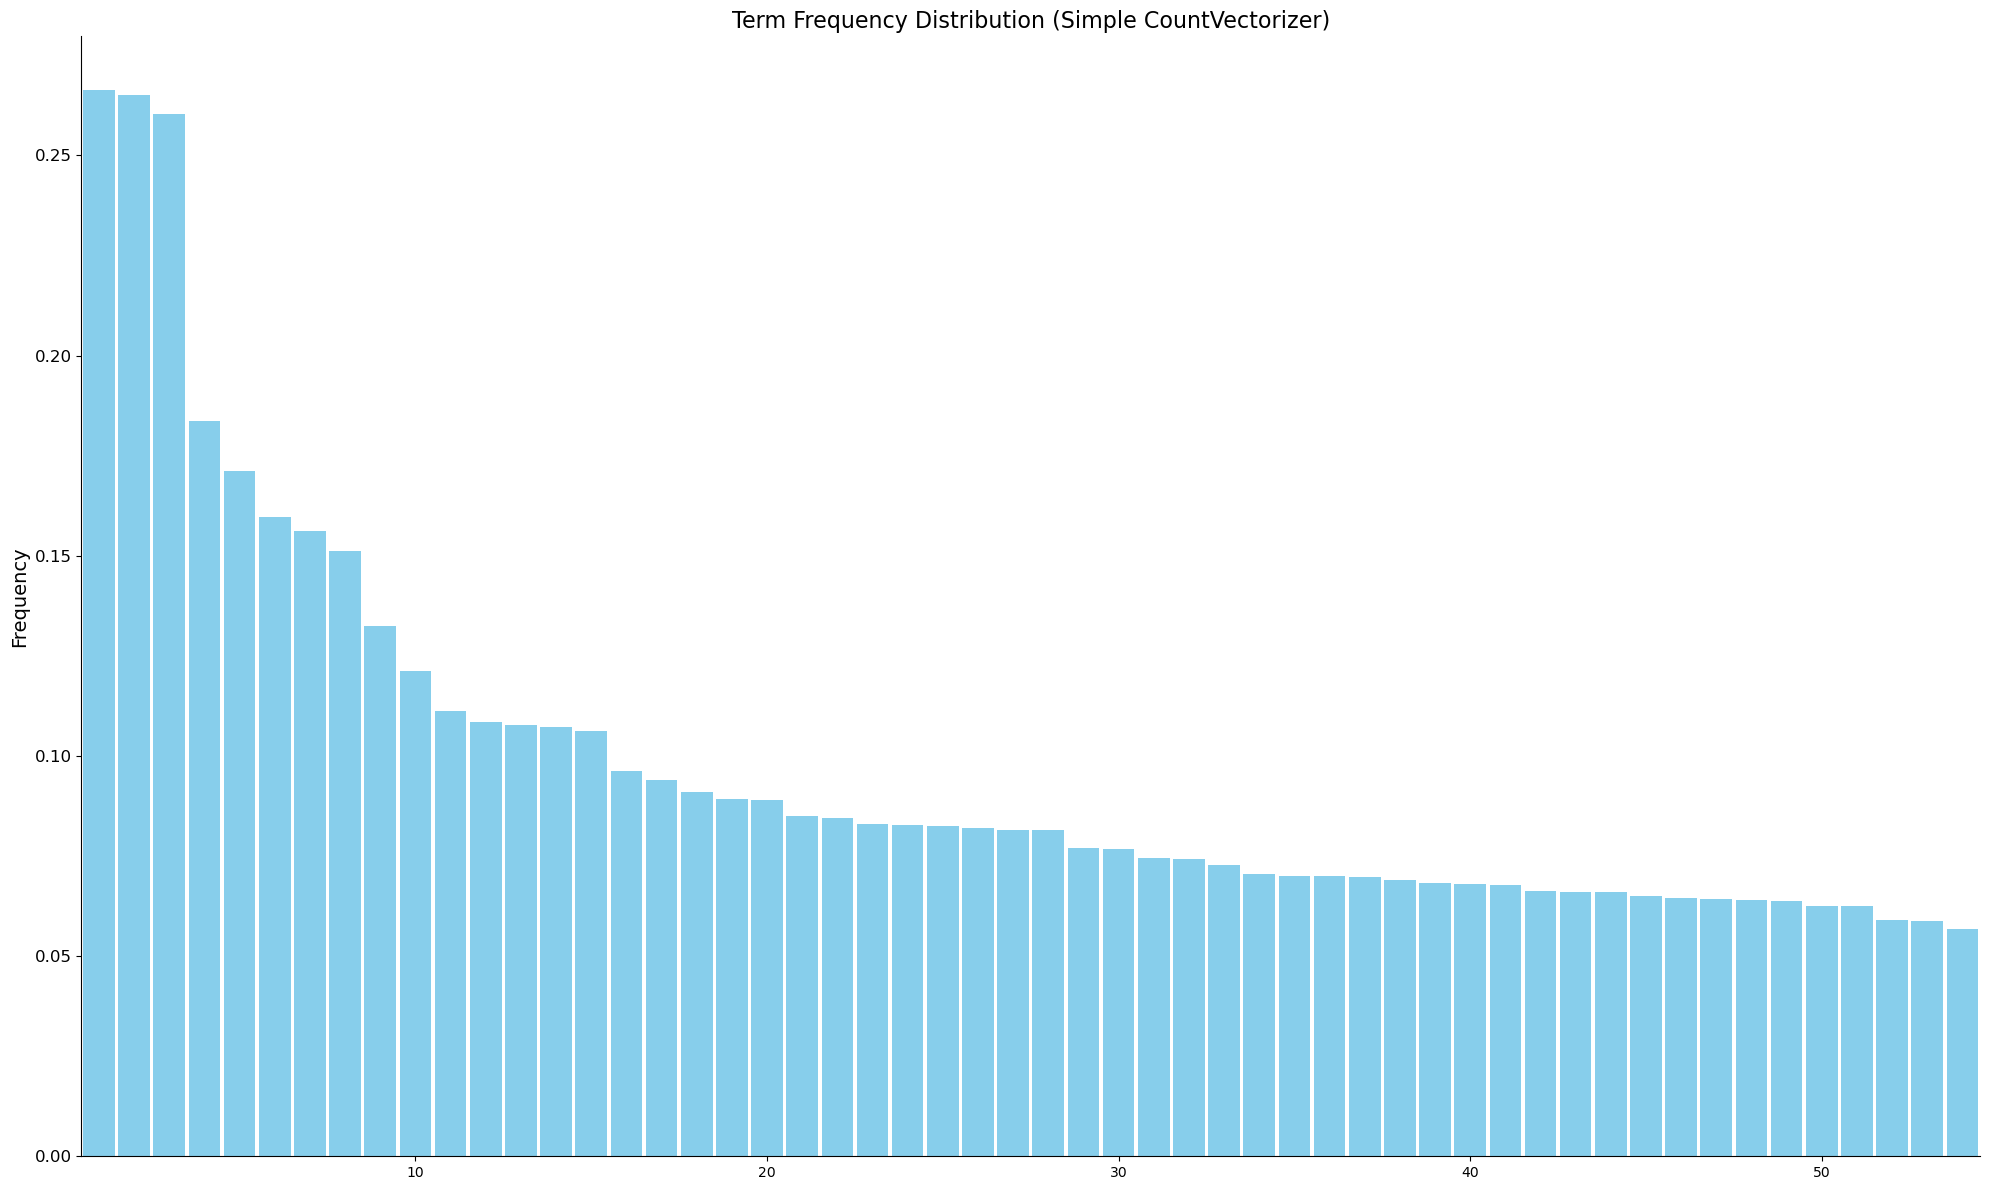

In [166]:
# Define the total number of terms
V = tfidf_dictionary_sexism.shape[0]

# Create the x-axis IDs
x_ids = tfidf_dictionary_sexism['id']

# Get the corresponding frequencies
frequencies = tfidf_dictionary_sexism['tfidf_score']

plt.figure(figsize=(20, 12))

# Create the bar plot with increased width and centered alignment
plt.bar(x_ids, frequencies, width=0.9, color='skyblue', align='center')

# Remove x-axis labels and tick marks
plt.xlabel('')
plt.ylabel('Frequency', fontsize=14)
plt.title('Term Frequency Distribution (Simple CountVectorizer)', fontsize=16)

# Customize the spines to retain only the bottom and left spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.xlim(0.5, V + 0.5)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [167]:
# Commond words across the two dictionaries 


# not finished
common_terms2 = set(dtm_bigrams['term']) & set(tfidf_dictionary_sexism['term'])
print(f"\n number of common words across the two dictionaries: {len(common_terms2)}")
print("examples of commond words:", list(common_terms2)[:20])


 number of common words across the two dictionaries: 0
examples of commond words: []


Why is the bigram 'kat_andre' the only one appearing in both dictionaries?

First, some context—who are Kat and Andre? They are participants in the TV show My Kitchen Rules. The dataset contains comments from a Twitter thread discussing this show, as well as some sexist comments that were posted on Twitter (X).

The reason this is the only common bigram is that, since bigrams are less frequent than unigrams, in the TF-IDF approach requires setting a bigger min_df value to reduce the dimensionality of the matrix, and the sexist bigramns have a lower document frequency than the treshold that we chosen.

As for how this bigram is related to sexism, there are two possible explanations:

There may have been a classification error in the dataset, where some comments about the TV show were mistakenly labeled as sexist.
There could actually be sexist comments related to the TV show.
After further investigation, we found that there were indeed sexist remarks in the comments related to My Kitchen Rules.

### Youtube dataset

We are going to use the dictionaries that we have already created to classify the ciberbulling coments on youtube.

In [168]:
# Download latest version
path = kagglehub.dataset_download("gbiamgaurav/cyberbullying-detection")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Available files:", files)

# Load a specific document (Assuming it's a CSV file)
file_path = os.path.join(path, "youtube_parsed_dataset.csv")  # Change "filename.csv" to the actual file name
youtube_corpus = pd.read_csv(file_path)

# Display the first few rows
print(youtube_corpus.head())

Path to dataset files: /Users/polgarcia/.cache/kagglehub/datasets/gbiamgaurav/cyberbullying-detection/versions/1
Available files: ['youtube_parsed_dataset.csv', 'twitter_parsed_dataset.csv', 'twitter_sexism_parsed_dataset.csv', 'attack_parsed_dataset.csv', 'twitter_racism_parsed_dataset.csv', 'kaggle_parsed_dataset.csv', 'toxicity_parsed_dataset.csv', 'aggression_parsed_dataset.csv']
   index UserIndex                                               Text  \
0      0        X1  Does N.e.bodyelse Hear her Crazy ass Screamin ...   
1      1        X2  There are so many things that are incorrect wi...   
2      2        X3  3:26 hahah my boyfriend showed this song to me...   
3      3     X2218  dick beyonce fuck y a ass hole you are truely ...   
4      4        X5  DongHaeTaemin and Kai ;A; luhansehun and bacon...   

   Number of Comments  Number of Subscribers  Membership Duration  \
0                  10                      1                    3   
1                   3               

Analyzing the YouTube data, we can see that are all the comments that a user wrote. We are going to check if that person had said a racism or a sexism comment.

In [169]:
youtube_corpus['UserIndex'].value_counts  #All unique

<bound method IndexOpsMixin.value_counts of 0          X1
1          X2
2          X3
3       X2218
4          X5
        ...  
3459    X3465
3460    X3466
3461    X3467
3462    X3468
3463    X3469
Name: UserIndex, Length: 3464, dtype: object>

Clean the data. But use a similar aproach than the twitter, because there still mentions between people in the comments and a lot of special characters.

In [170]:
youtube_corpus['clean_text'] = youtube_corpus['Text'].apply(preprocess_text)
print(youtube_corpus.head())
# Remove empty or whitespace-only rows in 'clean_text'
youtube_corpus = youtube_corpus.loc[youtube_corpus['clean_text'].str.strip() != '']

# Reset index after dropping rows (optional)
youtube_corpus = youtube_corpus.reset_index(drop=True)
youtube_corpus.head()
youtube_corpus.info()

   index UserIndex                                               Text  \
0      0        X1  Does N.e.bodyelse Hear her Crazy ass Screamin ...   
1      1        X2  There are so many things that are incorrect wi...   
2      2        X3  3:26 hahah my boyfriend showed this song to me...   
3      3     X2218  dick beyonce fuck y a ass hole you are truely ...   
4      4        X5  DongHaeTaemin and Kai ;A; luhansehun and bacon...   

   Number of Comments  Number of Subscribers  Membership Duration  \
0                  10                      1                    3   
1                   3                      0                    6   
2                   7                      0                    3   
3                  34                      0                    3   
4                  11                    173                    5   

   Number of Uploads  Profanity in UserID  Age  oh_label  \
0                  3                    0   15         0   
1                  5      

### RESULTS
we have some options. 
- use the dictionary that is obtained normal  dtm
- use the intersection of both
- use the union of both

In [171]:
#fist approach, use the dictionaries that obtained by the fist aproach. called: dictionary_sexism  dictionary_racism . For me are the ones that have more sense:
print(dictionary_racism)
print(dictionary_sexism)


               term  frequency   id
0             islam        512    1
1            muslim        454    2
2            murder        185    3
3          religion        152    4
4           muslims        141    5
..              ...        ...  ...
126            zero         21  127
127           start         21  128
128       terrorism         21  129
129  islam religion         20  130
130         violent         20  131

[131 rows x 3 columns]
         term  frequency  id
0      sexist        957   1
1       woman        625   2
2         not        449   3
3        girl        356   4
4         kat        347   5
..        ...        ...  ..
75  seriously         39  76
76      great         37  77
77       real         36  78
78      promo         36  79
79  woman not         34  80

[80 rows x 3 columns]


In [172]:
common_terms_ = set(dictionary_racism['term']) & set(dictionary_sexism['term'])
print(f"\n number of common words across the two dictionaries: {len(common_terms_)}")
print("examples of commond words:", list(common_terms_)[:35])


 number of common words across the two dictionaries: 25
examples of commond words: ['say', 'people', 'man', 'rape', 'try', 'way', 'thing', 'talk', 'hate', 'believe', 'woman', 'want', 'tell', 'stop', 'make', 'right', 'stupid', 'go', 'know', 'come', 'girl', 'not', 'mean', 'amp', 'sexist']


In [173]:

racism_terms = set(dictionary_racism['term'])
sexism_terms = set(dictionary_sexism['term'])

def count_offensive_words(text):
    tokens = str(text).split()
    racist_count = sum(1 for token in tokens if token in racism_terms)
    sexist_count = sum(1 for token in tokens if token in sexism_terms)
    return pd.Series([racist_count, sexist_count])

# Apply the function to the DataFrame
youtube_corpus[['racism_words', 'sexism_words']] = youtube_corpus['clean_text'].apply(count_offensive_words)


In [199]:
cv = CountVectorizer(ngram_range = (2,3),  min_df=20,max_df=0.9, lowercase=False)
cv.fit(racism["clean_text"])
vectorized_text=cv.transform(racism["clean_text"])
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

X = cv.fit_transform(racism["clean_text"])
terms = cv.get_feature_names_out()
# Calculate term frequencies (total counts across all documents)
term_frequencies = X.sum(axis=0).A1  # Convert to 1D array
bigrams_racism = pd.DataFrame({'term': terms,'frequency': term_frequencies})
bigrams_racism = bigrams_racism.sort_values(by='frequency', ascending=False).reset_index(drop=True)
bigrams_racism['id'] = bigrams_racism.index + 1
print(bigrams_racism.head(20))

document term matrix has size (1968, 11)
['declare war' 'declare war humanity' 'humanity year' 'islam declare'
 'islam declare war' 'islam religion' 'pedophile prophet'
 'prophet mohamme' 'quran hadith' 'war humanity' 'war humanity year']
                    term  frequency  id
0            declare war         53   1
1           war humanity         40   2
2        prophet mohamme         38   3
3   declare war humanity         36   4
4          islam declare         29   5
5      pedophile prophet         29   6
6      islam declare war         28   7
7           quran hadith         27   8
8          humanity year         26   9
9      war humanity year         25  10
10        islam religion         20  11


In [192]:
import pandas as pd
from nltk import bigrams


racism_terms = set(tuple(term.split()) for term in bigrams_racism['term'])

def count_bigrams(text):
    
    tokens = str(text).split()
    
    # Generate bigrams from the tokenized text
    text_bigrams = list(bigrams(tokens))
    
    # Count matching bigrams
    racist_count = sum(1 for bg in text_bigrams if bg in racism_terms)
    
    return pd.Series([racist_count])

# Apply the function to the DataFrame
youtube_corpus[['racism_bigrams']] = youtube_corpus['clean_text'].apply(count_bigrams)


In [193]:
youtube_corpus['racism_bigrams'].value_counts()

racism_bigrams
0    3430
1      15
4       2
Name: count, dtype: int64

In [194]:
youtube_corpus.to_csv('clasification_youtubeV1.csv',index=False)